In [1]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读数据并显示前五行
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

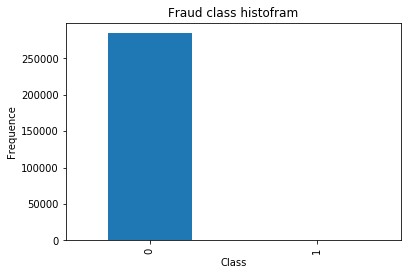

In [4]:
#假设 class=0表示正常   class=1表示异常 用柱状图显示出样本的分布
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histofram')
plt.xlabel('Class')
plt.ylabel('Frequence')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler   #里面的数据进行操作对Amount的数值进行操作得到normAmount   删除Amount和Time列。由于Amount的数值比较大，对其标准化操作一下。
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1,1))
data = data.drop(['Time','Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
X = data.loc[:, data.columns!='Class']    #除了Class列的值 所有列的值都输入进去
y= data.loc[:, data.columns=='Class']      
 
print(len(y))
print(len(X))

number_records_fraud = len(data[data.Class==1])   #取calss=1的数量
 
fraud_indices = np.array(data[data.Class==1].index) #将class=1的索引存储到fraud_indices
 
normal_indices = data[data.Class==0].index
 
#索引随机选择
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices =np.array(random_normal_indices)
 
#将两个样本结合在一起
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
 
under_sample_data = data.iloc[under_sample_indices, :]
#下采样数据集中  X_undersample 和y_undersample标签
X_undersample = under_sample_data.loc[:, under_sample_data.columns!='Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns=='Class']
 
print(len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data), len(under_sample_data[under_sample_data.Class==1]))
print(len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data), len(under_sample_data[under_sample_data.Class==0]))
 
print(len(under_sample_data))

284807
284807
0.5 492
0.5 492
984


In [16]:
#交叉验证    数据切分成训练集和测试集  假设训练集平均分三份 1,2训练  3来验证 |  1,3训练 2验证 |  2，3训练 1验证
from sklearn.model_selection import train_test_split
 
#所有数据集切分  7成的训练 3成的测试
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
 
print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train : ', len(y_train))
print('y_test : ', len(y_test))
 
#y_undersample  下采样数据集切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,y_undersample,test_size = 0.3, random_state = 0)
print('X_train_undersample : ',len(X_train_undersample))
print('X_test_undersample ：', len(X_test_undersample))
print('y_train_undersample : ', len(y_train_undersample))
print(len(y_test_undersample))

X_train : 199364
X_test : 85443
y_train :  199364
y_test :  85443
X_train_undersample :  688
X_test_undersample ： 296
y_train_undersample :  688
296


In [17]:
#模型建立
#recall召回率 作为模型评估标准   Recall = TP/(FP+TP)    
 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score   #KFold 几倍的交叉验证
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [34]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5, shuffle=False) #将训练集分成5分  交叉验证
 
    # 惩罚项的惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
 
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns=['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
 
    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
 
        recall_accs = []
        for iteration, indices in enumerate(fold, start=1):
 
            #   L1正则惩罚  + 惩罚发力度
            lr = LogisticRegression(C = c_param, penalty ='l1')
 
            #用训练数据中的训练数据去 训练模型。
            lr.fit(x_train_data.iloc[indices[0], :], y_train_data.iloc[indices[0], :].values.ravel())
 
            # 用训练数据里面的  验证数据来验证
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1], :].values)
 
            # 计算召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1], :].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
 
        # 求平均召回率
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
 
    # print(results_table.info())
    best_c = results_table.loc[results_table['Mean recall score'].astype('float64').idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [35]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)     #用下采样样本训练模型

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.9315068493150684
Iteration  2 : recall score =  0.9178082191780822
Iteration  3 : recall score =  0.9830508474576272
Iteration  4 : recall score =  0.9594594594594594
Iteration  5 : recall score =  0.9545454545454546

Mean recall score  0.9492741659911385

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9491525423728814
Iteration  4 : recall score =  0.9459459459459459
Iteration  5 : recall score =  0.9090909090909091

Mean recall score  0.9033036329066049

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.8904109589041096
It

In [37]:
#混淆矩阵的生成。
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9251700680272109


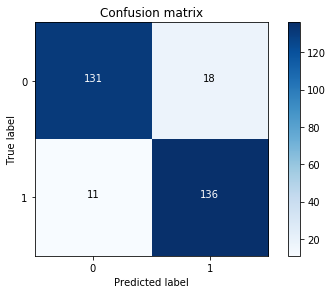

In [38]:
import itertools   #用测试数据上面跑的结果。
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [39]:
best_c = printing_Kfold_scores(X_train, y_train)    #用所有数据训练模型 

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.4925373134328358
Iteration  2 : recall score =  0.6027397260273972
Iteration  3 : recall score =  0.6833333333333333
Iteration  4 : recall score =  0.5692307692307692
Iteration  5 : recall score =  0.45

Mean recall score  0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.5671641791044776
Iteration  2 : recall score =  0.6164383561643836
Iteration  3 : recall score =  0.6833333333333333
Iteration  4 : recall score =  0.5846153846153846
Iteration  5 : recall score =  0.525

Mean recall score  0.5953102506435158

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.5522388059701493
Iteration  2 : recall score =  0.6164383561643836
Iteration  3 : recall score

Recall metric in the testing dataset:  0.6190476190476191


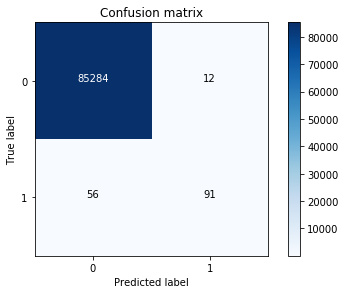

In [40]:
#误杀率比较低只有  12的样本误杀，但是 召唤率低。
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9727891156462585
Recall metric in the testing dataset:  0.9251700680272109
Recall metric in the testing dataset:  0.8639455782312925
Recall metric in the testing dataset:  0.8163265306122449
Recall metric in the testing dataset:  0.7755102040816326
Recall metric in the testing dataset:  0.5850340136054422


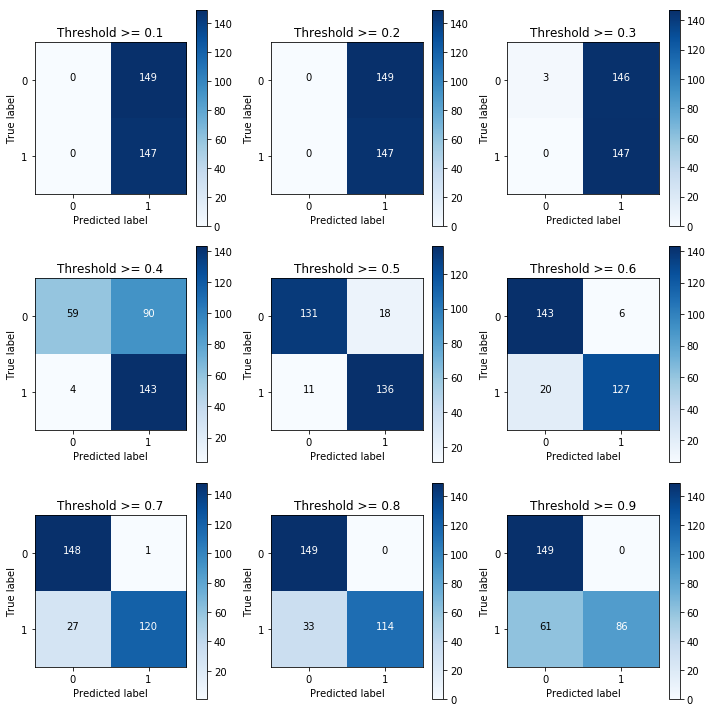

In [41]:
#采用不同的阈值
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
 
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)   #设置不同的阈值的测试结果
 
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
 
plt.figure(figsize=(10,10))
 
#当阈值为0.5和0.6的时候整体结果是比较好的。当阈值为0.1,0.2,0.3的时候召唤率是100%但是误杀率也是100%  当阈值是0.8,0.9的时候召唤率低但是误杀率也低。
j = 1
for i in thresholds:    
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
 
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 
    
plt.show()

In [47]:
#增加负样本数量   像本次的测试数据一样   负样本太少，导致训练的不是很理想。我们要自动生成一些负样本。
from imblearn.over_sampling import SMOTE

columns = data.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)
 
features = data[features_columns]
labels = data['Class']
 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)
 
#用SMOTE生成负样本，数量和正样本差不多。
oversampler = SMOTE(random_state=0)
os_features,os_labels = oversampler.fit_sample(features_train,labels_train)
#生成的负样本的数量
len(os_labels[os_labels==1])

227454

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9687064291247095
Iteration  4 : recall score =  0.9579362724085249
Iteration  5 : recall score =  0.958408898561238

Mean recall score  0.9340222045689794

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9704105344694036
Iteration  4 : recall score =  0.9600905683604269
Iteration  5 : recall score =  0.9604532814543696

Mean recall score  0.9352027614069248

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
I

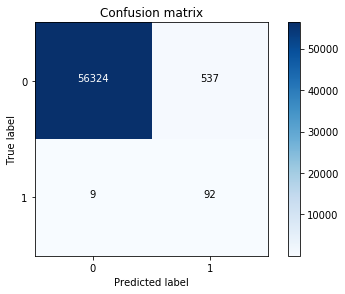

In [44]:
#生成负样本之后在进行训练。   得到的结果比之前要好很多
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)
 
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()